# Stationarity in Time Series (TS)

This notebook is with reference to the task:

>DS4: How can a time-series data be declared as stationery?

### Why do we need stationarity in Time Series Analysis (TSA)?
1. Stationary processes are easier to analyze
2. Assumed by most of the TS algorithms

Example of stationary and non-stationary TS:

![comparsion](images/Stationarycomparison.png)

## Weak-form stationarity

* Stationarity implies that taking consecutive samples of data with the same size should have identical covariances regardless of the starting point.

## Strict stationarity

* Stationarity implies samples of identical size have identical distribution.
* very restrictive form hence hardly observed

## Conditions to be stationary

In order to be weak form stationary, the time-series data must hold the following conditions:

1. Constant mean
2. Constant variance
3. Constant covariance between periods of identical distance

## ADF Testing

* Augmented Dicky Fuller test (ADF-test)
* hypothesis testing for stationarity
* where:
    - H0: Time series is not stationary
    - H1: Time series is stationary

In [1]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/airline-passengers.csv', index_col = 'Month', parse_dates = True)
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


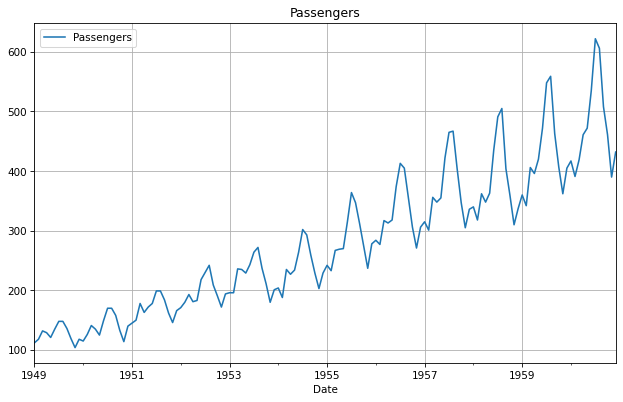

In [3]:
# displaying plot

fig = plt.figure(figsize=(10, 6), dpi=75)
df.plot(ax = plt.gca())
plt.title('Passengers')
plt.xlabel('Date')
plt.grid()
plt.show()

We'll perform this ADF Test using a time series with a differentiation order determined using the function below:

In [4]:
# alpha is significance level
def make_stationary(time_series, alpha = 0.05, column_name = None):
    if column_name is None:
        column_name = time_series.columns[0]

    p_values = []
    
    # testing differentiation orders from 1 to 10
    for i in range(1, 10):
        test = sts.adfuller(time_series[column_name].diff(i).dropna())
        p_values.append((i, test[1]))
        
    # keeping only values where p-value is less than alpha
    significant = [p for p in p_values if p[1] < alpha]
    
    # sort and keep best diff
    diff_order = sorted(significant)[0][0]
    
    # make stationary time series out of that diff
    stationary_series = time_series[column_name].diff(diff_order).dropna()
    
    # return differentiation order and time series
    return diff_order, stationary_series

In [5]:
diff_order, stationary_series = make_stationary(df)

In [6]:
print(diff_order)

2


In [7]:
sts.adfuller(stationary_series)

(-2.9616951355554217,
 0.03862975767698862,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

Since our p-value < 0.05, we can reject our null hypothesis and state the time series is stationary with a 95% confidence interval

## References

1. [Towardsdatascience - What is Stationarity in Time Series and why should you care](https://towardsdatascience.com/what-is-stationarity-in-time-series-and-why-should-you-care-f3b45082356b)